In [2]:
import functools
import os

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import display
from numpy.random import randint
from sklearn.linear_model import LinearRegression

In [87]:
# set styling for seaborn plots
sns.set_style('dark')
sns.set(rc = {'axes.grid': False, 'axes.facecolor': '#3C3C3C'})

In [4]:
'''
0: 0 - 100
1: 100 - 400
2: 400 - 900
3: 900 - 1600
'''
def rand_price(col):
    '''
    _Unused_
    Transforms a column of categorical variables to random prices within those categories.
    '''
    r.seed(11)
    return list(map(lambda x: round(r.uniform(100 * (x ** 2), 100 * ((x + 1) ** 2)), 2), col))

In [6]:
# set working directory and read in the dataset
os.chdir('D:/_UVA/Classes/_DS5100 Programming for Data Science/Projects/1')
df_full = pd.read_csv('phone.csv')
df_full.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


Price Range of the Phone
Screen Height
Screen Width
Weight of the Phone
Depth of the Phone

In [7]:
# subset the data
df = df_full[['price_range', 'talk_time', 'battery_power']]

In [8]:
df.dtypes

price_range      int64
talk_time        int64
battery_power    int64
dtype: object

In [108]:
# fit a linear model of talk_time against battery_power
df_lm = smf.ols('talk_time ~ battery_power', data = df).fit()
df_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              talk_time   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.524
Date:                Fri, 06 Aug 2021   Prob (F-statistic):             0.0188
Time:                        17:40:39   Log-Likelihood:                -6231.0
No. Observations:                2000   AIC:                         1.247e+04
Df Residuals:                    1998   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2023      0.365     27.947      0.000       9.486      10.918
battery_power     0.0007      0.000      2.350      0.019       0.000       0.001
==============================================================================
Omnibus:                     1730.893   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.721
Skew:                           0.004   Prob(JB):                     3.70e-27
Kurtosis:                       1.791   Cond. No.                     3.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# anova of the linear model
sm.stats.anova_lm(df_lm)

,df,sum_sq,mean_sq,F,PR(>F)
battery_power,1.0,164.557226,164.557226,5.524393,0.01885
Residual,1998.0,59515.200774,29.787388,NaN,NaN


<AxesSubplot:xlabel='talk_time', ylabel='battery_power'>

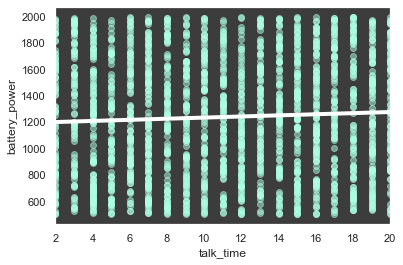

In [94]:
# plot a regression plot of the two variables we are exploring
sns.regplot(
    x = 'talk_time'
  , y = 'battery_power'
  , data = df
  , ci = None
  , line_kws = {
      'color': '#FFFFFF'
    , 'lw': 4
  }
  , scatter_kws = {
      'alpha': 0.5
    , 'color': '#ADFFE4'
  }
)

<AxesSubplot:xlabel='talk_time', ylabel='Count'>

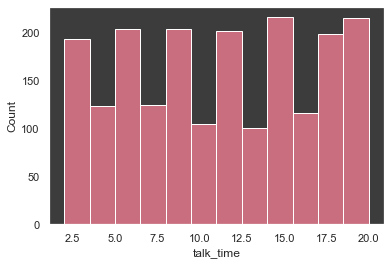

In [89]:
# histogram of talk_time to explore the distribution of the column
sns.histplot(df['talk_time'], color = '#F97F96')

<AxesSubplot:xlabel='battery_power', ylabel='Count'>

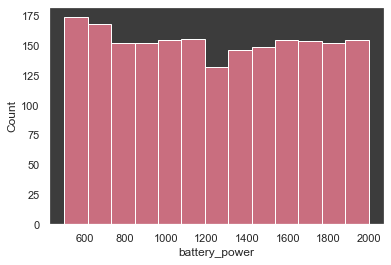

In [90]:
# histogram of battery_power to explore the distribution of the column
sns.histplot(df['battery_power'], color = '#F97F96')

In [14]:
# get the range of price_ranges
price_ranges = np.unique(df['price_range'])

# create new dataframe for mean data
# get the mean of the talk_time column, when grouped by price_range
df_min = pd.DataFrame(
    list(zip(price_ranges
        , list(map(lambda x: round(np.mean(df[df['price_range'] == x]['talk_time']), 2), price_ranges)))
    )
    , columns = ['price_range', 'talk_mean']
)
df_min.head()

,price_range,talk_mean
0,0,10.61
1,1,11.36
2,2,10.97
3,3,11.10


<AxesSubplot:xlabel='price_range', ylabel='talk_mean'>

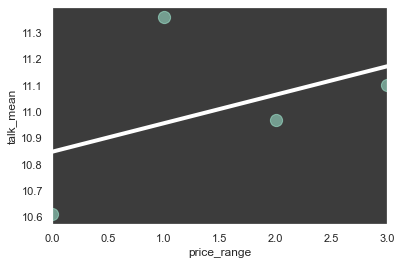

In [106]:
# regression plot of price_range against the means of talk_time
sns.regplot(
    x = 'price_range'
  , y = 'talk_mean'
  , data = df_min
  , ci = None
  , line_kws = {
      'color': '#FFFFFF'
    , 'lw': 4
  }
  , scatter_kws = {
      'alpha': 0.5
    , 'color': '#ADFFE4'
    , 's': 150
  }
)

In [16]:
# vectorized anonymous function to exaggerate the size of the plot points
display_warp = np.vectorize(lambda x: round((round((x / 1000) + 1) ** round(x / 100)) / 10))

# add the means of battery_power, when grouped by price_range, to the mean dataframe
# add the exaggerated sizes to the dataframe for easy plotting
df_min['battery_mean'] = list(map(lambda x: round(np.mean(df[df['price_range'] == x]['battery_power'])), price_ranges))
df_min['battery_display'] = display_warp(df_min['battery_mean'])
df_min.head()

,price_range,talk_mean,battery_mean,battery_display
0,0,10.61,1117,205
1,1,11.36,1229,410
2,2,10.97,1228,410
3,3,11.10,1380,1638


<AxesSubplot:xlabel='price_range', ylabel='talk_mean'>

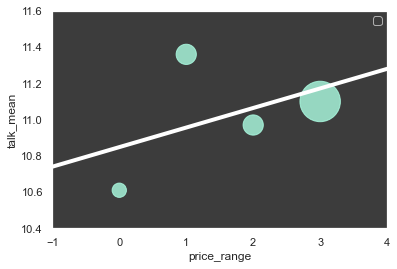

In [109]:
# regression plot of the means of talk_time, when grouped by price_range
# with plot points sized by the means of battery_power, when grouped by price_range
f, ax = plt.subplots()
ax.set(xlim = (-1, 4), ylim = (10.4, 11.6))
sns.pointplot
ax.legend(labels = ['1110 hours', '1400 hours'])
sns.regplot(
    x = 'price_range'
  , y = 'talk_mean'
  , data = df_min
  , ax = ax
  , ci = None
  , line_kws = {
      'color': '#FFFFFF'
    , 'lw': 4
  }
  , scatter_kws = {
      'color': '#ADFFE4'
    , 's': df_min['battery_display']
  }
  , truncate = False
)